In [1]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.display import Image

from IPython.core.display import display, HTML
# display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
# display(HTML("<style>.container { font-weight: bold !important;}</style>"))
# display(HTML("<style>.container { width: 98% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

# LDA

- Linear Discriminant Analysis
- 선형 판별 분석(Linear Discriminant Analysis, LDA)
- PCA가 데이터의 전체적인 분포를 참고하여 새로운 basis를 설정하고, 그 축에 맞게 데이터를 새롭게 projection 하는 것이 목표라면, LDA는 지도적인 방법으로 basis를 찾아서 그 축을 분리에 이용한 뒤, 최적의 분리를 완성한 뒤 projection을 하는 것이 목표이다.



<img src='https://nirpyresearch.com/wp-content/uploads/2018/11/PCAvsLDA-1024x467.png' width='500'>


- sklearn의 LDA


```
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)

lda.fit(X, y)

data_lda = lda.transform(X)
```

### 붓꽃 데이터 셋에 LDA 적용하기 

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

columns = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(iris.data , columns=columns)
iris_df['target']=iris.target
iris_df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,target
130,7.4,2.8,6.1,1.9,2
77,6.7,3.0,5.0,1.7,1
90,5.5,2.6,4.4,1.2,1


In [4]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(iris.data)

In [5]:
iris_scaled.shape

(150, 4)

In [6]:
#차원 축소
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#객체 생성
lda = LinearDiscriminantAnalysis(n_components=2)

#차원 축소
#지도 -> y 데이터가 필요
lda.fit(iris_scaled, iris.target)

#차원 축소 결과를 별도의 변수에 저장
iris_lda = lda.transform(iris_scaled)
iris_lda.shape

(150, 2)

In [7]:
#데이터프레임에 추가
iris_df['target'] = iris.target

iris_df['lda_x'] = iris_lda[:,0]
iris_df['lda_y'] = iris_lda[:,1]
iris_df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,target,lda_x,lda_y
4,5.0,3.6,1.4,0.2,0,8.132309,0.514463
39,5.1,3.4,1.5,0.2,0,7.688231,-0.009224
23,5.1,3.3,1.7,0.5,0,6.251404,0.439696


<AxesSubplot:xlabel='lda_x', ylabel='lda_y'>

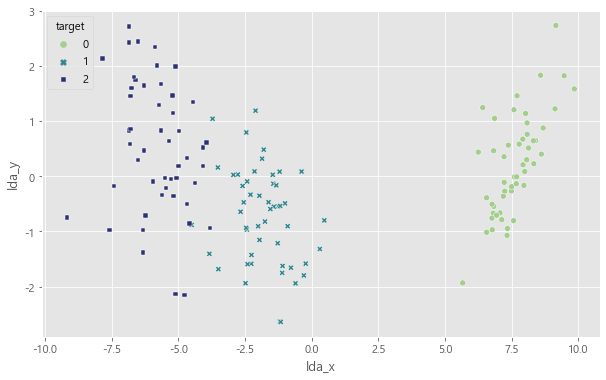

In [8]:
#시각화
sns.scatterplot(x='lda_x', y='lda_y', data=iris_df, hue='target', style='target', palette='crest')

## digit 데이타셋 활용

In [9]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [10]:
digits_df = pd.DataFrame(digits.data, columns=digits.feature_names)
digits_df['target'] = digits.target
digits_df.head(2)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1


In [11]:
digits_scaled = StandardScaler().fit_transform(digits.data)
digits_scaled.shape

(1797, 64)

In [12]:
digits_df['target'].value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

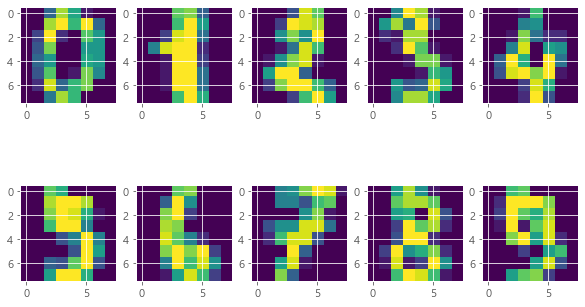

In [13]:
fig, axes = plt.subplots(2, 5)
# axes[0,0].imshow(digits.images[9])
num = 0
for i in range(2):
    for j in range(5):
        axes[i,j].imshow(digits.images[num])
        num += 1

In [14]:
#차원 축소
lda = LinearDiscriminantAnalysis(n_components=2)

lda.fit(digits_scaled, digits.target)
digits_lda = lda.transform(digits_scaled)
digits_lda.shape

(1797, 2)

In [15]:
digits_df['lda_x'] = digits_lda[:,0]
digits_df['lda_y'] = digits_lda[:,1]
digits_df.sample(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target,lda_x,lda_y
726,0.0,0.0,0.0,10.0,16.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,8.0,15.0,1.0,0.0,0.0,1,-1.598195,-3.892796
1060,0.0,0.0,12.0,14.0,6.0,0.0,0.0,0.0,0.0,2.0,...,0.0,13.0,9.0,8.0,2.0,0.0,0.0,9,-1.284070,1.271532
1536,0.0,0.0,0.0,13.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,12.0,10.0,0.0,0.0,0.0,4,6.946063,-2.771540


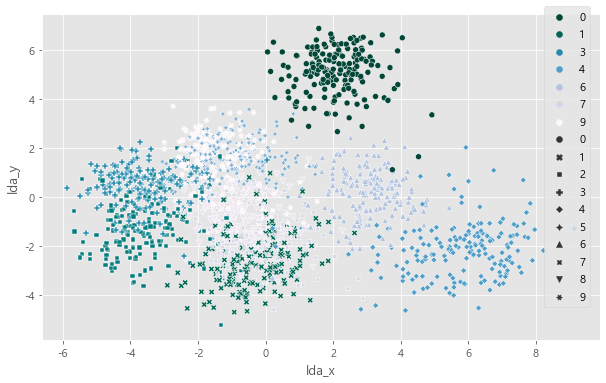

In [16]:
sns.scatterplot(x='lda_x', y='lda_y', data=digits_df, hue='target', palette='PuBuGn_r', style='target')
plt.legend(loc=[0.9,0.1])
#제대로 분류되지 않으면 번호 누락됨 (인식 실패)

## 올리베티 얼굴 사진 데이터

- AT&T와 캠프리지 대학 전산 연구실에서 공동으로 제작한 얼굴 사진 데이터 베이스의 간략화된 버전. 
- fetch_olivetti_faces() 명령으로 로드하며 다음과 같이 구성되어 있다. 
- 64x64=4096 해상도의 흑백 이미지이고 40명의 사진 400장으로 구성되어 있다.

- 타겟 데이터 : 40명의 개인을 나타내는 식별 번호
- 특징 데이터 : 각 개인의 얼굴 이미지

In [17]:
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()
# print(olivetti.DESCR)
olivetti.keys()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\TFG5076XG\scikit_learn_data


dict_keys(['data', 'images', 'target', 'DESCR'])

In [19]:
olivetti.data.shape

(400, 4096)

In [20]:
olivetti.images.shape

(400, 64, 64)

In [18]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

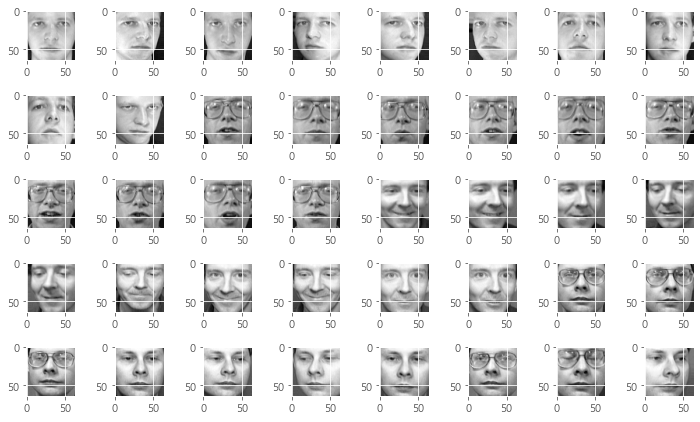

In [21]:
fig, axes = plt.subplots(5, 8)
num = 0
for i in range(5):
    for j in range(8):
        axes[i,j].imshow(olivetti.images[num], cmap=plt.cm.gray)
        num += 1
plt.tight_layout()
plt.show()

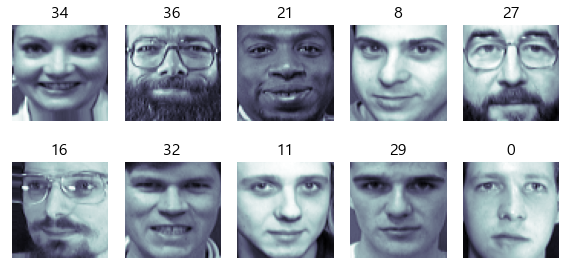

In [22]:
np.random.seed(111)
N = 2
M = 5
fig = plt.figure(figsize=(8, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(olivetti.data)), N * M)

for i in range(N):
    for j in range(M):
        k = klist[i*M+j]
        ax = fig.add_subplot(N, M, i*M+j+1)
        ax.imshow(olivetti.images[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(olivetti.target[k])
plt.tight_layout()
plt.show()

In [23]:
olivetti.data.shape

(400, 4096)

In [24]:
olivetti_df = pd.DataFrame(olivetti.data)
olivetti_df['target'] = olivetti.target
olivetti_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0


In [25]:
#스케일링
olivetti_scaled = StandardScaler().fit_transform(olivetti.data)
olivetti_scaled.shape

(400, 4096)

In [26]:
#차원 축소
lda = LinearDiscriminantAnalysis(n_components=2)

lda.fit(olivetti_scaled, olivetti.target)
olivetti_lda = lda.transform(olivetti_scaled)
olivetti_lda.shape

(400, 2)

In [27]:
olivetti_lda_df = pd.DataFrame(olivetti_lda, columns=['lda_x', 'lda_y'])

In [28]:
olivetti_lda_df['target'] = olivetti.target

In [29]:
olivetti_lda_df['target'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

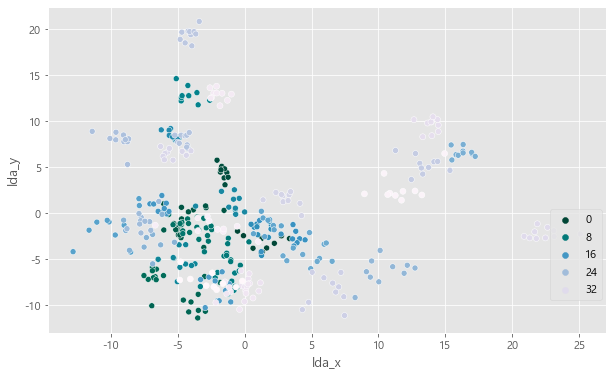

In [30]:
sns.scatterplot(x='lda_x', y='lda_y', data=olivetti_lda_df, hue='target', palette='PuBuGn_r')
plt.legend(loc=[0.9,0.1])

In [ ]:
#분류를 많이 못한듯